<a href="https://colab.research.google.com/github/MohammedMujtaba/Deep-Learning-Projects/blob/main/MNIST_Handwritten_Digital_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


###Dataset
using the MNIST Handwritten Digital Classification Dataset.

In [3]:
from tensorflow.keras.datasets import mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # split into tetsing and training

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]  # let's have a look at one pixel

0

In [6]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

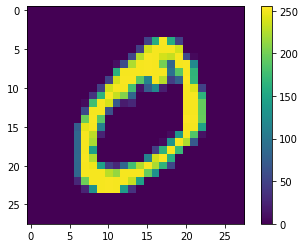

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing


In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

###Compile the Model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model

In [13]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9260
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1124 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0271 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0191 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

##Evaluating the Model

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9775
Test accuracy: 0.9775000214576721


##Making Predictions

In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([3.9650350e-10, 1.7242842e-10, 9.6563355e-08, 1.3017476e-05,
       2.6077185e-14, 1.5144590e-11, 2.9391213e-17, 9.9998677e-01,
       5.8991888e-11, 1.1103504e-07], dtype=float32)

In [17]:
np.argmax(predictions[0])

7

In [18]:
test_labels[0]

7

##Verifying Predictions

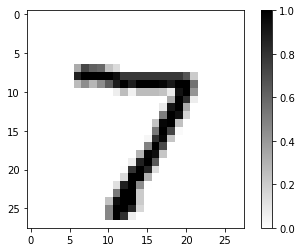

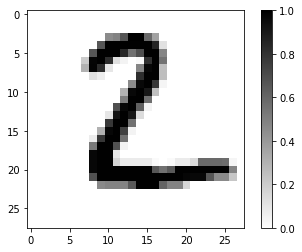

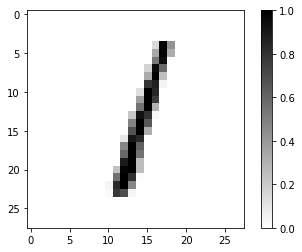

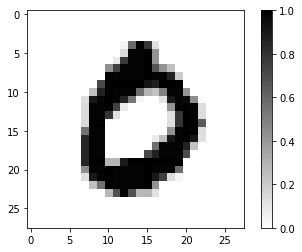

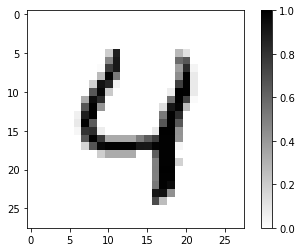

In [23]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image):
 
  prediction = model.predict(np.array([image]))
  predicted_class = test_labels[np.argmax(prediction)]
  show_image(image)


def show_image(img):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()


for i in range(5):
  image = test_images[i]
  predict(model, image)


In [25]:
for i in range(5):
  print(test_labels[i])

7
2
1
0
4
